导入需要的库

In [1]:
from IPython import display
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import scipy.constants as C
import math
from scipy.integrate import odeint
import random

plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

$\alpha$粒子入射向金原子核时处于中心势场中，由于$\alpha$粒子远小于原子核的质量，且金原子处于薄金箔的晶格结构中，位置相对固定，因此忽略原子核与$\alpha$粒子作用导致的原子核的位移。当不考虑原子核的大小以及电子与$\alpha$粒子的相互作用时，设原子核的位置为$(0,0)$，$\alpha$粒子入射位置为$(x,y)$，则$\alpha$受原子的电场力大小为
$$F = \frac{1}{4\pi \varepsilon_0} \frac{2Ze^2}{r^2}$$
其中
$$r^2 = x^2 + y^2 $$
因此$\alpha$粒子的加速度分量为
$$\left\{\begin{align}
a_x&=\frac{F_x}{m_\alpha}=\frac{1}{4\pi \varepsilon_0} \frac{2Ze^2}{m_\alpha}\frac{x}{r^3}=K\frac{x}{r^3}\\
a_y&=\frac{F_y}{m_\alpha}=\frac{1}{4\pi \varepsilon_0} \frac{2Ze^2}{m_\alpha}\frac{y}{r^3}=K\frac{y}{r^3}
\end{align}\right.
$$

$$\begin{array}{c}
a=\frac{e^{2}}{4 \pi \varepsilon_{0}} \frac{Z_{\alpha} Z_{\mathrm{Au}}}{m_{\alpha}} \frac{r_{i}}{r^{3}} \\
\frac{e^{2}}{4 \pi \varepsilon_{0}}=1.44\ \mathrm{fm} \cdot \mathrm{MeV} \\
m_{\alpha} c^{2}=3727.3794066\ \mathrm{MeV}
\end{array}$$

需要用到的常量和常系数：

In [2]:
# alpha粒子质量和原子序数
m_alpha = C.physical_constants["alpha particle mass energy equivalent in MeV"][0]
m_alpha_kg = C.physical_constants["alpha particle mass"][0]
Z_alpha=2
Z_Au=79
Z_Ag=47
# 常系数：
# k1=e^2/4\pi\varepsilon_0
# k2=Z_\alpha Z_Au/m_\alpha
MeV = 1e6 * C.e
k1 = 1.44  # fm.Mev
k2 =Z_alpha * Z_Au / m_alpha * (C.c * 1e15)**2  # fm^2/(s^2 Mev)
k3 =Z_alpha * Z_Ag / m_alpha * (C.c * 1e15)**2  # fm^2/(s^2 Mev)

相同瞄准距离不同入射位置的alpha粒子散射：

In [3]:
# 不同入射能量数组
E = np.array([1, 2, 3, 5, 7, 10]) * MeV
v0 = np.sqrt(2 * E / m_alpha_kg) * 1e15  # fm/s
# 不同颜色字符串
colorlist=['k','r','g','c','m','y','b','black','silver']

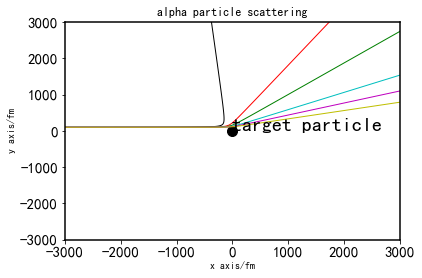

<function matplotlib.pyplot.show(close=None, block=None)>

In [4]:
# 求解所用微分方程 四列分别为粒子的x正方向速度，x正方向加速度，y正方向速度和y正方向加速度
def differential_equations(y,t):
    return np.array([y[1],k1*k2*y[0] /(np.sqrt((y[0])**2+(y[2])**2))**3,y[3],k1*k2*y[2]/(np.sqrt((y[0])**2+(y[2])**2))**3])

# 由初始条件和微分方程求解出不同时刻t的坐标(x,y)的函数
def energy(val):    
    initial_value=np.array([-3e3,val,100,0])
    t = np.arange(0,1e-18,(1e-20))
    res = odeint(differential_equations,initial_value, t)
    x,y = res[:-1,0],res[:-1,2]
    return x,y

# 创建所需要大小的矩阵，行数为同一入射能量求解出的数据点数，列数为不同的入射能量数
# da means different aim distence
x_da=np.ones((100,6), dtype='float')
y_da=np.ones((100,6), dtype='float')

# 对不同入射能量用函数求解，将得到的数据填入矩阵
for i in range(0,6):
    val=v0[i]
    x_da[:,i],y_da[:,i]=energy(val)
    
# 绘图
# 第一层循环对象是行数，同一行的数据为同一时间t不同入射能量的alpha粒子的坐标
for j in range(len(x_da)):
    plt.cla()# 清空图表
    plt.plot(0,0,'ko',ms=10) # 靶粒子位置
    plt.text(2,-2,'target particle',fontsize=20)
    plt.xlim((-3e3,3e3))
    plt.ylim((-3e3,3e3))
    #第二层循环对象是列数，同一列的数据为一定入射能量的alpha粒子不同时间的坐标
    for k in range(0,6):
        plt.plot(x_da[:j+1,k], y_da[:j+1,k], color=colorlist[k],linewidth=1)# 绘制曲线，每次从第一行数据画到第j行，粒子经过的轨迹会被保留
        plt.scatter(x_da[j,k], y_da[j,k], color='red', s=15)# 绘制最新点
    plt.title('alpha particle scattering')
    plt.xlabel("x axis/fm")
    plt.ylabel("y axis/fm")
    display.clear_output(wait=True)
    plt.pause(0.00000001)
plt.show

截取动图不同时刻的子图

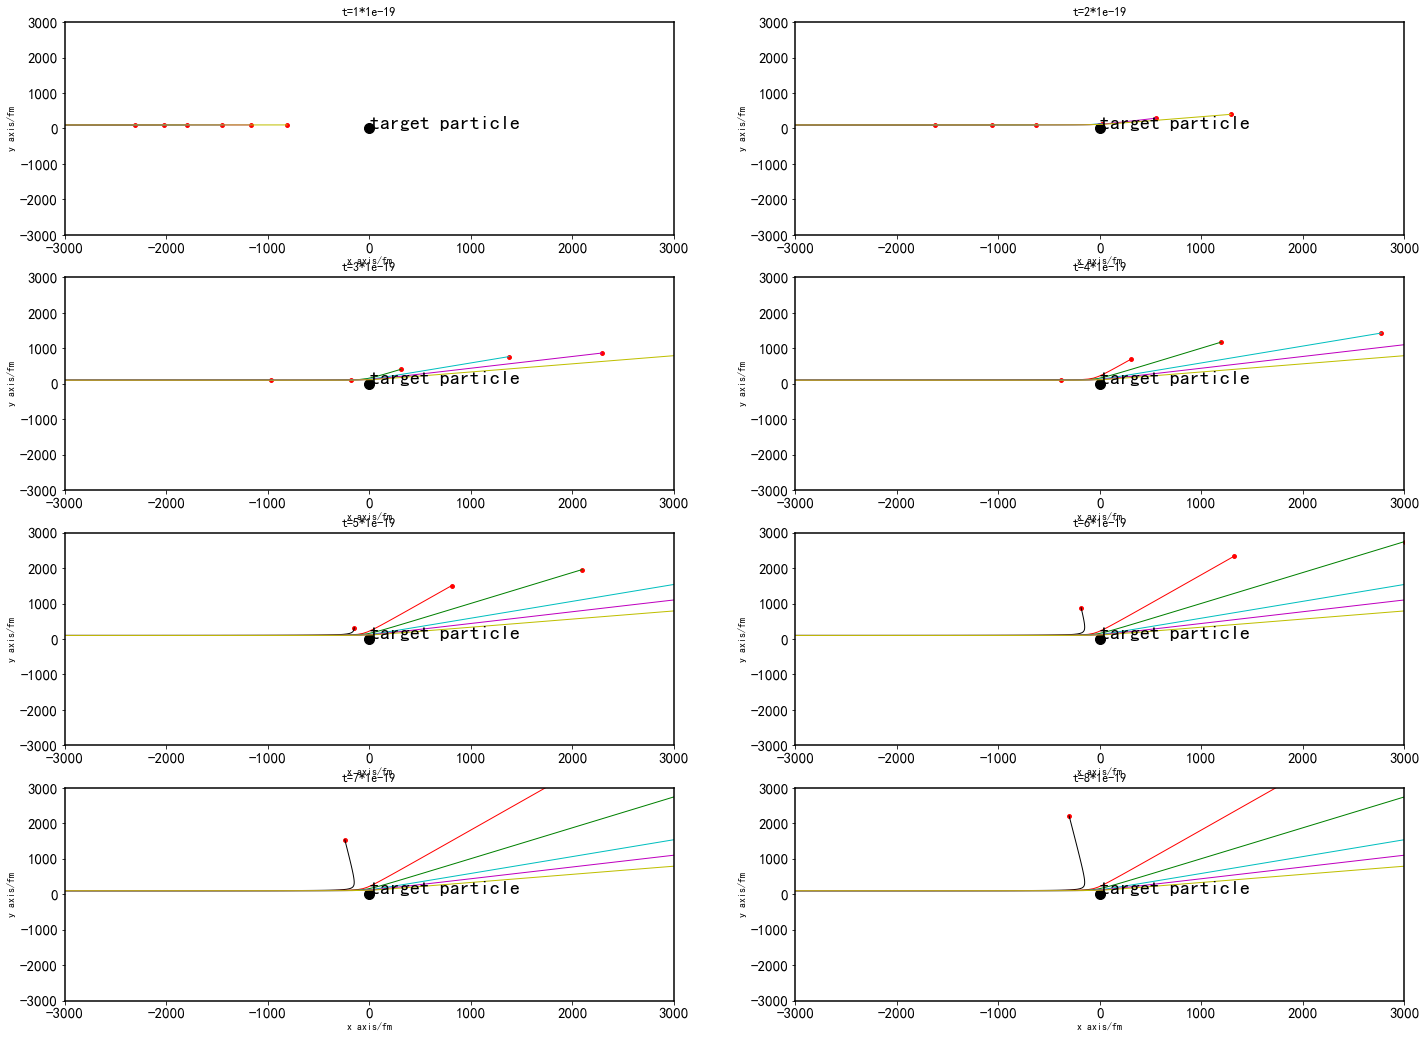

In [5]:
fig,axs = plt.subplots(4,2,figsize=(24,18))
(ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)=axs
for i in range(1,9):
    plt.subplot(4,2,i)
    plt.plot(0,0,'ko',ms=10) # 靶粒子位置
    plt.text(2,-2,'target particle',fontsize=20)
    plt.xlim((-3e3,3e3))
    plt.ylim((-3e3,3e3))
    plt.title('t=%d*1e-19'%(i))
    plt.xlabel("x axis/fm")
    plt.ylabel("y axis/fm")
    j=i*10
    for k in range(0,6):
        plt.plot(x_da[:j+1,k], y_da[:j+1,k], color=colorlist[k],linewidth=1)# 绘制曲线，每次从第一行数据画到第j行，粒子经过的轨迹会被保留
        plt.scatter(x_da[j,k], y_da[j,k], color='red', s=15)# 绘制最新点
    

相同入射能量不同距离的alpha粒子散射

In [6]:
E = 1* MeV
v01 = np.sqrt(2 * E / m_alpha_kg) * 1e15  # fm/s
aim_distance = [-1000, -500, -100, -10, 10, 100, 500, 1000]

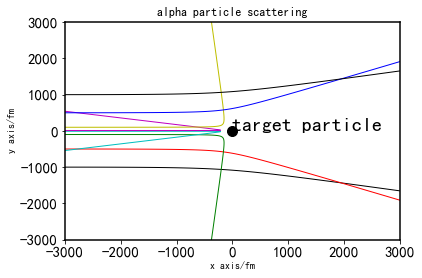

<function matplotlib.pyplot.show(close=None, block=None)>

In [7]:
# 由初始条件和微分方程求解出不同时刻t的坐标(x,y)的函数
def aimdistance(c):
    initial_value2=np.array([-3e3,v01,c,0])
    t = np.arange(0,1e-18,(1e-20))
    res = odeint(differential_equations,initial_value2, t)
    x,y = res[:-1,0],res[:-1,2]
    return x,y

# 创建所需要大小的矩阵，行数为同一入射能量求解出的数据点数，列数为不同的入射能量数
# de means diffrernt energy
x_de=np.ones((100,8), dtype='float')
y_de=np.ones((100,8), dtype='float')

# 对不同入射能量用函数求解，将得到的数据填入矩阵
for i in range(0,8):
    c=aim_distance[i]
    x_de[:,i],y_de[:,i]=aimdistance(c)

#绘图
# 第一层循环对象是行数，同一行的数据为同一时间t不同入射能量的alpha粒子的坐标
for j in range(len(x_de)):
    plt.cla()# 清空图表
    plt.plot(0,0,'ko',ms=10) # 靶粒子位置
    plt.text(2,-2,'target particle',fontsize=20)
    plt.xlim((-3e3,3e3))
    plt.ylim((-3e3,3e3))
    #第二层循环对象是列数，同一列的数据为一定入射能量的alpha粒子不同时间的坐标
    for k in range(0,8):
        plt.plot(x_de[:j+1,k], y_de[:j+1,k], color=colorlist[k],linewidth=1)# 绘制曲线，每次从第一行数据画到第j行，粒子经过的轨迹会被保留
        plt.scatter(x_de[j,k], y_de[j,k], color='red', s=15)# 绘制最新点
    plt.title('alpha particle scattering')
    plt.xlabel("x axis/fm")
    plt.ylabel("y axis/fm")
    display.clear_output(wait=True)
    plt.pause(0.00000001)
plt.show

不同时刻的子图：

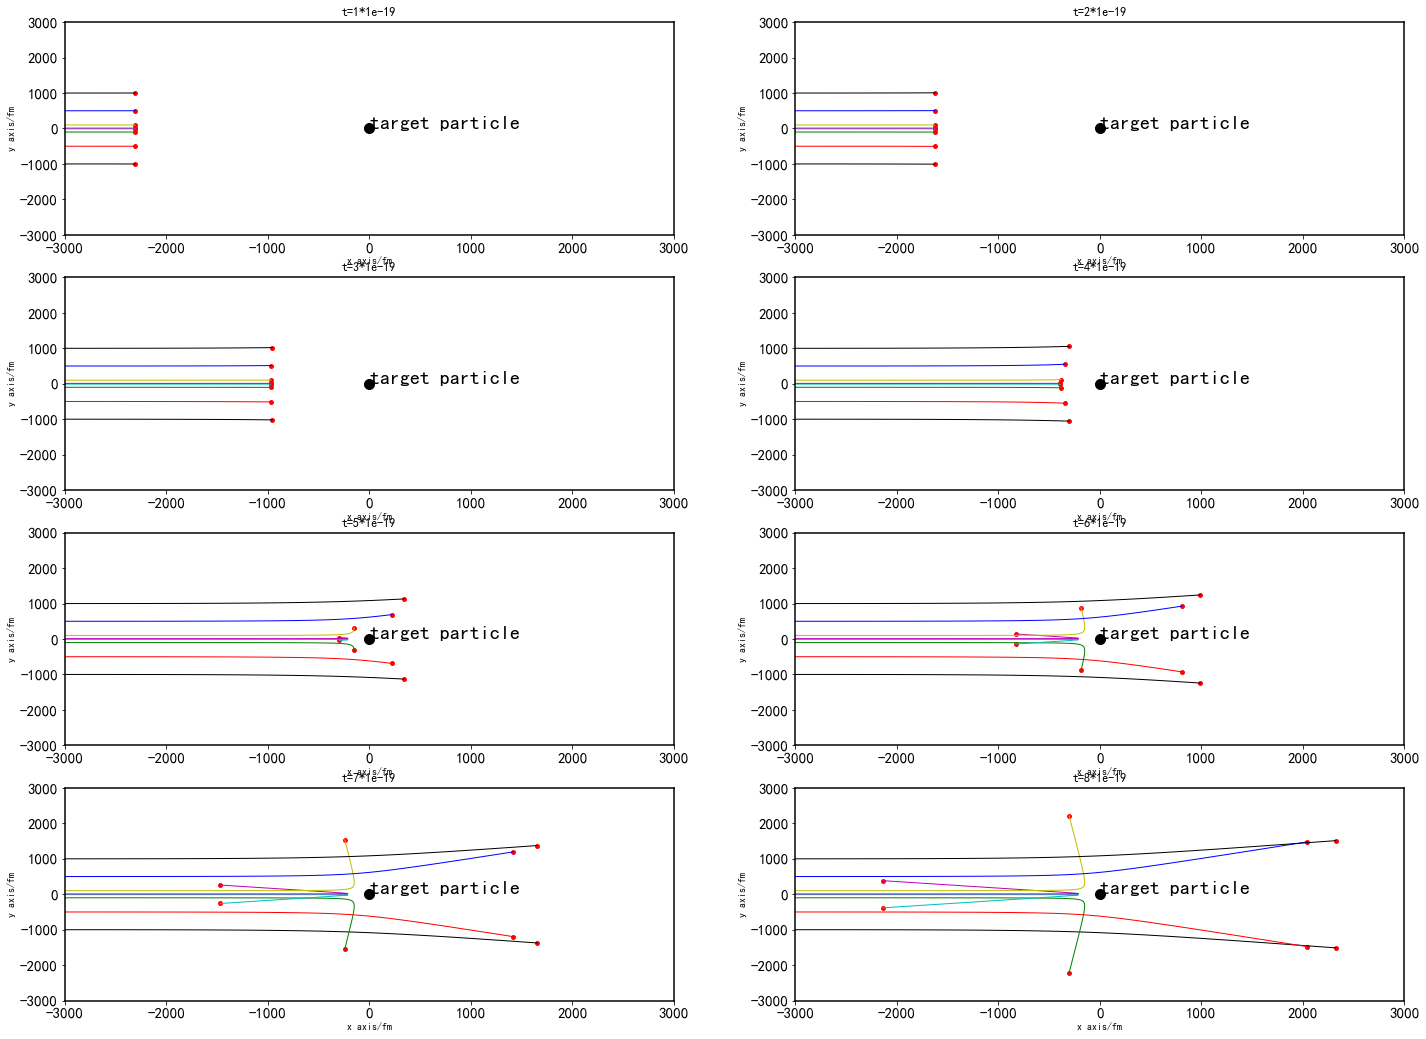

In [8]:
fig,axs = plt.subplots(4,2,figsize=(24,18))
(ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)=axs
for i in range(1,9):
    plt.subplot(4,2,i)
    plt.plot(0,0,'ko',ms=10) # 靶粒子位置
    plt.text(2,-2,'target particle',fontsize=20)
    plt.xlim((-3e3,3e3))
    plt.ylim((-3e3,3e3))
    plt.title('t=%d*1e-19'%(i))
    plt.xlabel("x axis/fm")
    plt.ylabel("y axis/fm")
    j=i*10
    for k in range(0,8):
        plt.plot(x_de[:j+1,k], y_de[:j+1,k], color=colorlist[k],linewidth=1)# 绘制曲线，每次从第一行数据画到第j行，粒子经过的轨迹会被保留
        plt.scatter(x_de[j,k], y_de[j,k], color='red', s=15)# 绘制最新点

不同靶粒子：

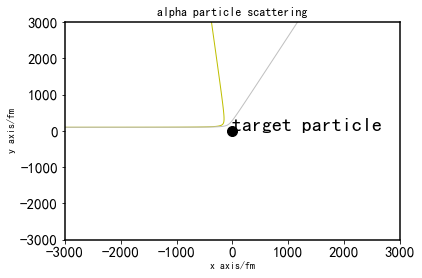

<function matplotlib.pyplot.show(close=None, block=None)>

In [9]:
# 创建所需要大小的矩阵，行数为同一入射能量求解出的数据点数，列数为不同的入射能量数
#dtp means different target particle
t = np.arange(0,1e-18,(1e-20))
x_dtp=np.ones((100,2), dtype='float')
y_dtp=np.ones((100,2), dtype='float')

# 由初始条件和微分方程求解出不同时刻t的坐标(x,y)的函数
def differential_equations(y,t):
    return np.array([y[1],k1*k2*y[0] /(np.sqrt((y[0])**2+(y[2])**2))**3,y[3],k1*k2*y[2]/(np.sqrt((y[0])**2+(y[2])**2))**3])
def differential_equations2(y,t):
    return np.array([y[1],k1*k3*y[0] /(np.sqrt((y[0])**2+(y[2])**2))**3,y[3],k1*k3*y[2]/(np.sqrt((y[0])**2+(y[2])**2))**3])

# 对不同靶粒子用函数求解，将得到的数据填入矩阵
def target_particle_Gold():
    initial_value3=np.array([-3e3,v01,100,0])
    res = odeint(differential_equations,initial_value3, t)
    x,y = res[:-1,0],res[:-1,2]
    return x,y
def target_particle_Silver():
    initial_value3=np.array([-3e3,v01,100,0])
    res = odeint(differential_equations2,initial_value3, t)
    x,y = res[:-1,0],res[:-1,2]
    return x,y

x_dtp[:,0],y_dtp[:,0]=target_particle_Gold();x_dtp[:,1],y_dtp[:,1]=target_particle_Silver()

for j in range(len(x_dtp)):
    plt.cla()
    plt.plot(0,0,'ko',ms=10)
    plt.text(2,-2,'target particle',fontsize=20)
    plt.xlim((-3e3,3e3));plt.ylim((-3e3,3e3))
    plt.plot(x_dtp[:j+1,0], y_dtp[:j+1,0], color='y',linewidth=1)# 绘制曲线
    plt.plot(x_dtp[:j+1,1], y_dtp[:j+1,1], color='silver',linewidth=1)
    plt.scatter(x_dtp[j,0], y_dtp[j,0], color='red', s=15)# 绘制最新点
    plt.scatter(x_dtp[j,1], y_dtp[j,1], color='red', s=15)
    plt.title('alpha particle scattering')
    plt.xlabel("x axis/fm")
    plt.ylabel("y axis/fm")
    display.clear_output(wait=True)
    plt.pause(0.00000001)
plt.show

不同时刻子图

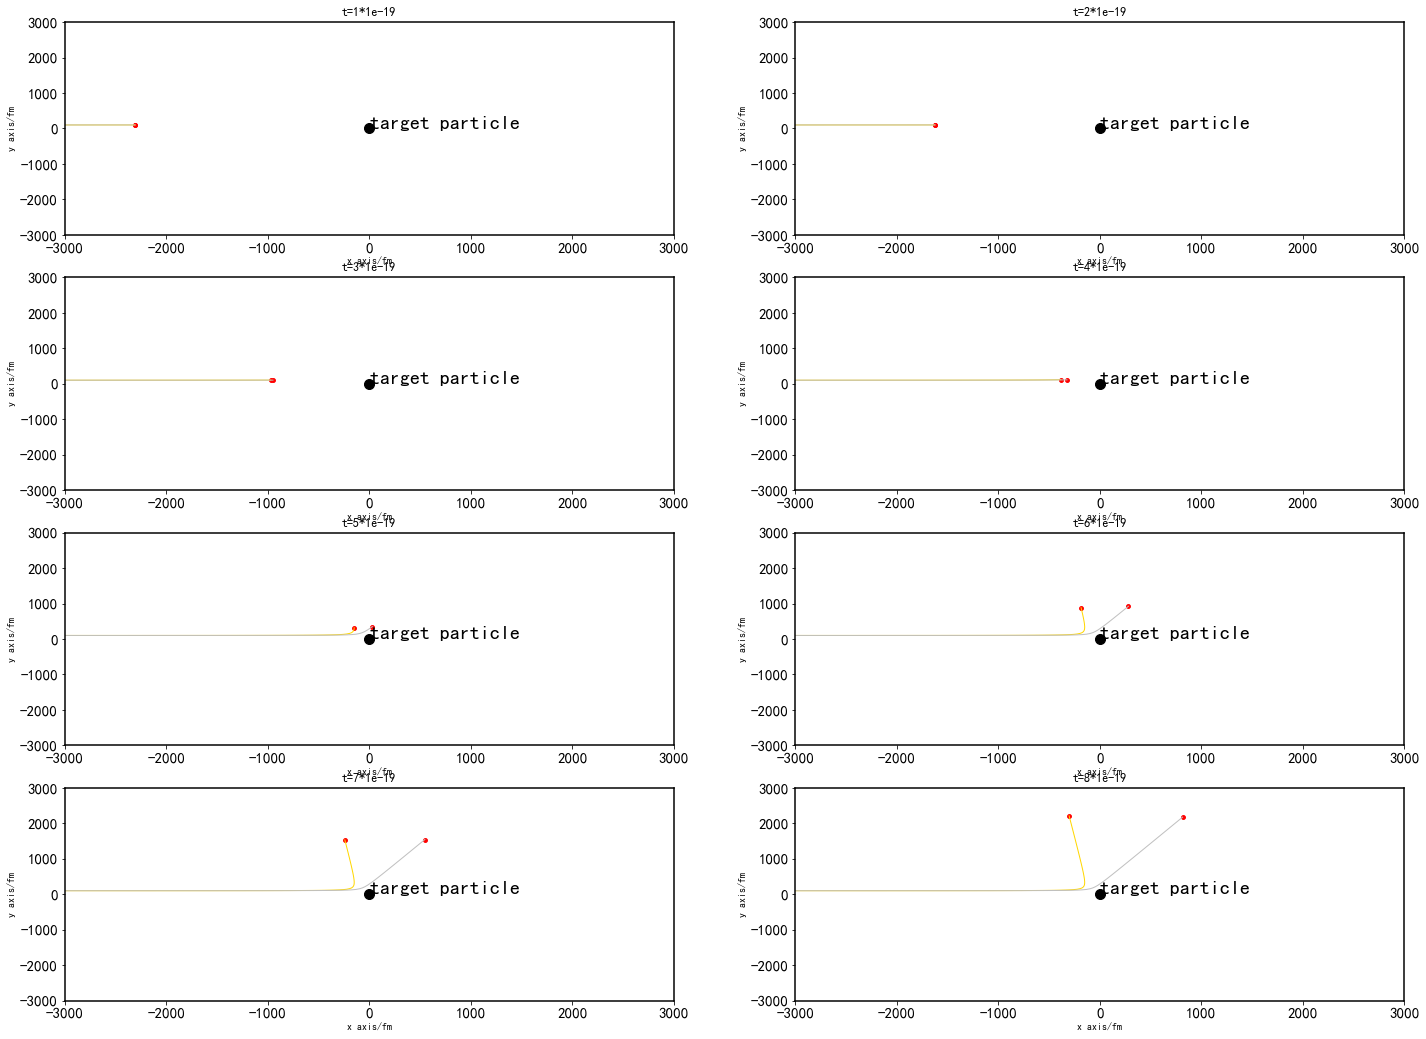

In [10]:
colorlist1=['gold','silver']
fig,axs = plt.subplots(4,2,figsize=(24,18))
(ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)=axs
for i in range(1,9):
    plt.subplot(4,2,i)
    plt.plot(0,0,'ko',ms=10) # 靶粒子位置
    plt.text(2,-2,'target particle',fontsize=20)
    plt.xlim((-3e3,3e3))
    plt.ylim((-3e3,3e3))
    plt.title('t=%d*1e-19'%(i))
    plt.xlabel("x axis/fm")
    plt.ylabel("y axis/fm")
    j=i*10
    for k in range(0,2):
        plt.plot(x_dtp[:j+1,k], y_dtp[:j+1,k], color=colorlist1[k],linewidth=1)# 绘制曲线，每次从第一行数据画到第j行，粒子经过的轨迹会被保留
        plt.scatter(x_dtp[j,k], y_dtp[j,k], color='red', s=15)# 绘制最新点

三维情况下使用微分方程绘图的方法不再方便，选择使用动力学方程求解

In [11]:
from IPython import display
from mpl_toolkits import mplot3d
from scipy.integrate import odeint
import scipy.constants as C
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['lines.linewidth'] = 2.5
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

enfont = mpl.font_manager.FontProperties(fname="C:/Windows/Fonts/timesi.ttf", size=18)

$\alpha$粒子入射向金原子核时处于中心势场中，由于$\alpha$粒子远小于原子核的质量，且金原子处于薄金箔的晶格结构中，位置相对固定，因此忽略原子核与$\alpha$粒子作用导致的原子核的位移。当不考虑原子核的大小以及电子与$\alpha$粒子的相互作用时，设原子核的位置为$(0,0,0)$，$\alpha$粒子入射位置为$(x,y,z)$，则$\alpha$受原子的电场力大小为
$$F = \frac{1}{4\pi \varepsilon_0} \frac{2Ze^2}{r^2}$$
其中
$$r^2 = x^2 + y^2 + z^2 $$
因此$\alpha$粒子的加速度分量为
$$\left\{\begin{align}
a_x&=\frac{F_x}{m_\alpha}=\frac{1}{4\pi \varepsilon_0} \frac{2Ze^2}{m_\alpha}\frac{x}{r^3}=K\frac{x}{r^3}\\
a_y&=\frac{F_y}{m_\alpha}=\frac{1}{4\pi \varepsilon_0} \frac{2Ze^2}{m_\alpha}\frac{y}{r^3}=K\frac{y}{r^3}\\
a_z&=\frac{F_z}{m_\alpha}=\frac{1}{4\pi \varepsilon_0} \frac{2Ze^2}{m_\alpha}\frac{z}{r^3}=K\frac{z}{r^3}
\end{align}\right.
$$

In [12]:
# alpha粒子质量与原子序数
m_alpha = C.physical_constants["alpha particle mass energy equivalent in MeV"][
    0]
Z_alpha = 2

# Au原子原子序数
Z_Au = 79

# 常系数:
# k1=e^2/4\pi\varepsilon_0
# k2=Z_\alpha Z_Au/m_\alpha
k1 = 1.44  # fm.Mev
k2 = Z_alpha * Z_Au / m_alpha * (C.c * 1e15)**2  # fm^2/(s^2 Mev)

x0 = 0  # 原子核x坐标 fm
y0 = 0  # 原子核y坐标 fm
z0 = 0  # 原子核z坐标 fm
dt = 1e-20  # 时间步长

In [13]:
# 求解x,y,z方向加速度函数
def acceleration3(x, y, z):  # fm/s^2
    r = np.sqrt((x - x0)**2 + (y - y0)**2 + (z - z0)**2)
    ax = k1 * k2 * (x - x0) / r**3
    ay = k1 * k2 * (y - y0) / r**3
    az = k1 * k2 * (z - z0) / r**3
    return ax, ay, az


#求解x,y,z方向速度函数
def velocity3(ax0, ay0, az0, vx1, vy1, vz1):  # fm/s
    vx2 = vx1 + ax0 * dt
    vy2 = vy1 + ay0 * dt
    vz2 = vz1 + az0 * dt
    return vx2, vy2, vz2


#求解x,y,z方向速度函数
def coordinate3(x_pos, y_pos, z_pos, vx, vy, vz):  # fm
    x_new = x_pos + vx * dt
    y_new = y_pos + vy * dt
    z_new = z_pos + vz * dt
    return x_new, y_new, z_new

三维空间不同瞄准距离：

In [14]:
#需要用到的常量
m_alpha_kg = C.physical_constants["alpha particle mass"][0]
MeV = 1e6 * C.e
E = 1 * MeV
v0 = np.sqrt(2 * E / m_alpha_kg) * 1e15  # fm/s

In [15]:
#设定不同的入射位置
def getRandomPointInCircle(num, radius, centerx, centery):
    samplePoint = []
    for i in range(num):
        theta = random.random() * 2 * np.pi
        r = random.uniform(0, radius**2)
        x = math.cos(theta) * (r**0.5) + centerx
        y = math.sin(theta) * (r**0.5) + centery
        samplePoint.append((int(x), int(y)))

    return np.array(samplePoint)

In [16]:
#初始条件
par_num = 8
radius = 1000
centerx,centery = 0, 0
samp = getRandomPointInCircle(par_num, radius, centerx, centery)

In [17]:
t_num = 100
X, Y, Z = np.zeros((par_num, t_num)), np.zeros((par_num, t_num)), np.zeros(
    (par_num, t_num))
for i, (y, z) in enumerate(samp):
    x = -3e3
    vx = v0
    vy = 0
    vz = 0
    for n in range(t_num):
        X[i, n] = x
        Y[i, n] = y
        Z[i, n] = z
        ax0, ay0, az0 = acceleration3(x, y, z)
        vx, vy, vz = velocity3(ax0, ay0, az0, vx, vy, vz)
        x, y, z = coordinate3(x, y, z, vx, vy, vz)

In [18]:
#给不同入射粒子路径不同颜色
ALL_Color = [[1, 0, 0, 1], [0, 252 / 255, 0, 1], [0, 0, 1, 1], [46 / 255, 217 / 255, 1, 1],
             [1, 156 / 255, 85 / 255, 1], [1, 51 / 255, 129 / 255, 1],
              [186 / 255, 12 / 255, 1, 1],   [0, 0, 0, 1]]

<IPython.core.display.Javascript object>


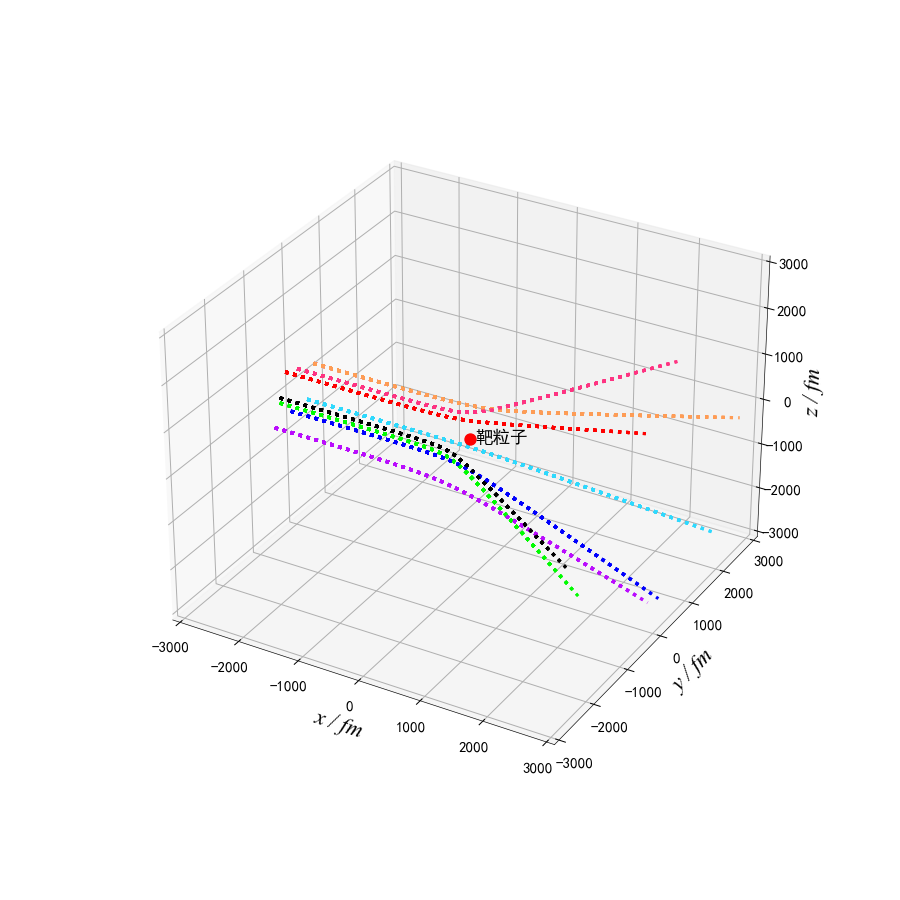

In [19]:
fig = plt.figure(figsize=(10, 10))
# 创建3d绘图区域
ax = plt.axes(projection='3d')

#设定三维空间范围
ax.set_xlim((-3e3, 3e3))
ax.set_ylim((-3e3, 3e3))
ax.set_zlim((-3e3, 3e3))

ax.set_xlabel(
    'x / fm',
    fontproperties=enfont,
)
ax.set_ylabel(
    'y / fm',
    fontproperties=enfont,
)
ax.set_zlabel(
    'z / fm',
    fontproperties=enfont,
)

ax.tick_params(labelsize=12)

ax.scatter(x0, y0, z0, s=Z_Au, c='r')
ax.text(x0 + 120.0, y0 - 70, z0, '靶粒子', fontsize=14)
for i in range(t_num):
    for l in range(par_num):
        ax.plot3D(X[l, :i + 1], Y[l, :i + 1], Z[l, :i + 1], ':',c=ALL_Color[l])
plt.show()

三维空间不同入射能量：

In [20]:
E = np.array([1,2,3,5,7,10,12,14])/10* MeV
v0 = np.sqrt(2 * E / m_alpha_kg) * 1e15  # fm/s

In [21]:
t_num = 200
X, Y, Z = np.zeros((par_num, t_num)), np.zeros((par_num, t_num)), np.zeros(
    (par_num, t_num))
for i, (y, z) in enumerate(samp):
    x = -3e3
    vx = v0[i]
    vy = 0
    vz = 0
    for n in range(t_num):
        X[i, n] = x
        Y[i, n] = y
        Z[i, n] = z
        ax0, ay0, az0 = acceleration3(x, y, z)
        vx, vy, vz = velocity3(ax0, ay0, az0, vx, vy, vz)
        x, y, z = coordinate3(x, y, z, vx, vy, vz)

<IPython.core.display.Javascript object>


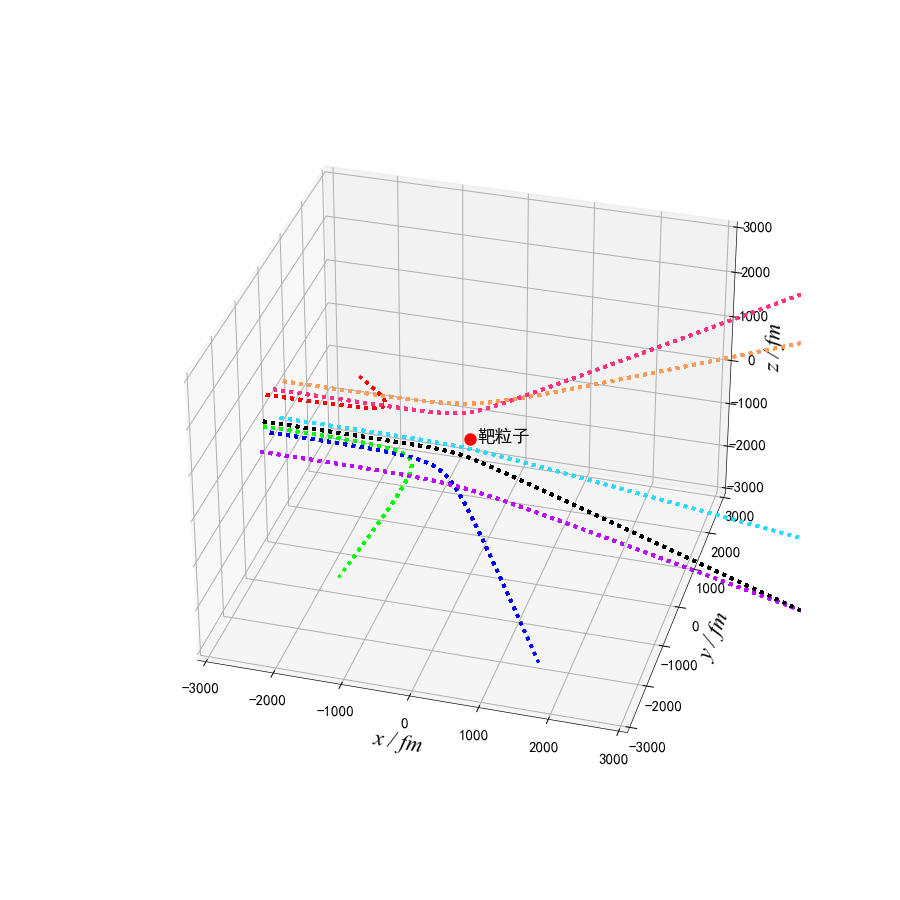

In [22]:
fig = plt.figure(figsize=(10, 10))
# 创建3d绘图区域
ax = plt.axes(projection='3d')

#设定三维空间范围
ax.set_xlim((-3e3, 3e3))
ax.set_ylim((-3e3, 3e3))
ax.set_zlim((-3e3, 3e3))

ax.set_xlabel(
    'x / fm',
    fontproperties=enfont,
)
ax.set_ylabel(
    'y / fm',
    fontproperties=enfont,
)
ax.set_zlabel(
    'z / fm',
    fontproperties=enfont,
)

ax.tick_params(labelsize=12)

ax.scatter(x0, y0, z0, s=Z_Au, c='r')
ax.text(x0 + 120.0, y0 - 70, z0, '靶粒子', fontsize=14)
for i in range(t_num):
    for l in range(par_num):
        ax.plot3D(X[l, :i + 1], Y[l, :i + 1], Z[l, :i + 1], ':',c=ALL_Color[l])
plt.show()

核外电子对粒子散射的影响：

为了探究核外电子的影响，将核外电子当作一个均匀分布的球体

加速度$a=Z_{1}Z_{2}e^2/4\pi \varepsilon r^2m_{\alpha } $

其中

$e^2/4\pi \varepsilon m_{\alpha }≈0.03458 m^3/s^3$

In [31]:
import matplotlib.animation as animation
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
from scipy import optimize

plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

<IPython.core.display.Javascript object>


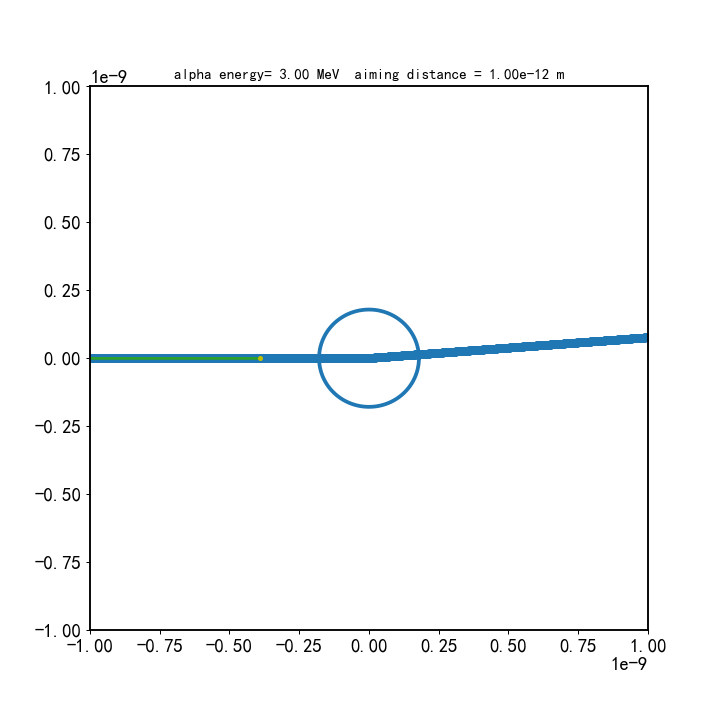

In [32]:
#参数设置
atomic_n=79
electron_n=atomic_n

atomic_r=1.79*10**-10   #1.79埃米
nuclear_r=10**-15

v_light=3*10**8

energy_alpha=3    #MeV/c^2,alpha粒子的质量为3752MeV/c^2

def acceleration(x,y):
    distance=(x**2+y**2)**0.5
    
      
    a_x=2*atomic_n*(x/distance**3)*0.03458
    a_y=2*atomic_n*(y/distance**3)*0.03458
        
    '''
    if distance>=atomic_r:
        a_x=0
        a_y=0
    elif distance<atomic_r and distance>=nuclear_r:
        a_x=2*atomic_n*(1-(distance/atomic_r)**3)*(x/distance**3)*0.03458
        a_y=2*atomic_n*(1-(distance/atomic_r)**3)*(y/distance**3)*0.03458 
    else:
        a_x=2*atomic_n*((distance/nuclear_r)**3)*(x/distance**3)*0.03458
        a_y=2*atomic_n*((distance/nuclear_r)**2)*(y/distance**3)*0.03458

    '''
    return a_x,a_y

def fun(y,t):
    acceleration_x,acceleration_y=acceleration(y[0],y[2])
    return np.array([y[1],#x一阶导
                     acceleration_x,#x二阶导
                    y[3],#y一阶导
                     acceleration_y])#y二阶导

#初始条件
x_initial=-10**-9
speed_alpha=v_light*(2*energy_alpha/3752)**0.5
y_initial=10**-12
speed_y=0

y0=np.array([x_initial,speed_alpha,y_initial,speed_y])
time_total=x_initial/speed_alpha*-2
time_num=1000
t = np.linspace(0,time_total,time_num)


res = odeint(fun,y0,t)
x,y = res[:,0],res[:,2]
r=np.sqrt(x**2+y**2)
#print(np.min(r))


fig = plt.figure(figsize=(8,8))
plt_range=10**-9
plt.axis([-plt_range,plt_range,-plt_range,plt_range]) 
plt.title('alpha energy= %1.2f MeV  aiming distance = %.2e m'%(energy_alpha,y_initial))

plt.scatter(x,y)

circle_theta=np.linspace(0,2*np.pi,500)
plt.plot(atomic_r*np.cos(circle_theta),atomic_r*np.sin(circle_theta))
plt.plot(nuclear_r*np.cos(circle_theta),nuclear_r*np.sin(circle_theta))

#plt.text(0.5,-0.4,'靶粒子',fontsize=20)

trace,=plt.plot([],[],',-',lw=2)
point,=plt.plot([],[],'yo',ms=3)
history_x, history_y =[],[]


#time_text = ax.text(0.05, 0.9, s='',ha='left',transform=ax.transAxes)

def animate(i):
    
    this_x=x[i]
    this_y=y[i]
    
    history_x.append(x[i])
    history_y.append(y[i])
    
    if i == 0:
        history_x.clear()
        history_y.clear()


    trace.set_data(history_x, history_y)
    point.set_data(this_x,this_y)
    #time_text.set_text( 'time = %.2e s' % (i*time_totla/time_num))
    
    return trace,point

ani= animation.FuncAnimation(fig,animate,len(y),interval=10, repeat=True)
#ani.save("无核外电子影响.gif", writer='pillow',fps=45)#保存

plt.show()

通过对比可以看到，如果将核外电子看作是均匀分布的球体，与忽略核外电子相比，alpha粒子更难被散射，因此，可以考虑电子层具有一定厚度

2.1024680519336293e-12


<IPython.core.display.Javascript object>


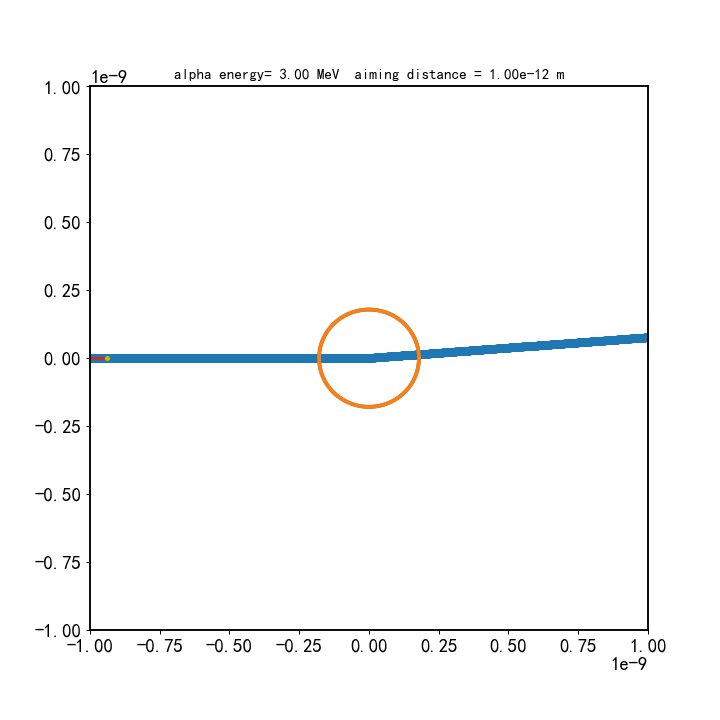

In [23]:
#参数设置
atomic_n=79
electron_n=atomic_n

atomic_r=1.79*10**-10   #1.79埃米
nuclear_r=10**-15

electron_width=0
electron_r=atomic_r-electron_width

v_light=3*10**8

energy_alpha=3    #MeV/c^2,alpha粒子的质量为3752MeV/c^2

def acceleration(x,y):
    distance=(x**2+y**2)**0.5

    if distance>=atomic_r:
        a_x=0
        a_y=0
    elif distance<atomic_r and distance>=electron_r:
        a_x=2*atomic_n*(1-(distance**3-electron_r**3)/(atomic_r**3-electron_r**3))*(x/distance**3)*0.03458
        a_y=2*atomic_n*(1-(distance**3-electron_r**3)/(atomic_r**3-electron_r**3))*(y/distance**3)*0.03458
    elif distance<electron_r and distance>=nuclear_r:
        a_x=2*atomic_n*(x/distance**3)*0.03458
        a_y=2*atomic_n*(y/distance**3)*0.03458
    else:
        a_x=2*atomic_n*((distance/nuclear_r)**3)*(x/distance**3)*0.03458
        a_y=2*atomic_n*((distance/nuclear_r)**3)*(y/distance**3)*0.03458

    return a_x,a_y

def fun(y,t):
    acceleration_x,acceleration_y=acceleration(y[0],y[2])
    return np.array([y[1],#x一阶导
                     acceleration_x,#x二阶导
                    y[3],#y一阶导
                     acceleration_y])#y二阶导

#初始条件
x_initial=-10**-9
speed_alpha=v_light*(2*energy_alpha/3752)**0.5
y_initial=10**-12
speed_y=0

y0=np.array([x_initial,speed_alpha,y_initial,speed_y])
time_total=x_initial/speed_alpha*-2
time_num=500
t = np.linspace(0,time_total,time_num)


res = odeint(fun,y0,t)
x,y = res[:,0],res[:,2]
r=np.sqrt(x**2+y**2)
print(np.min(r))


fig = plt.figure(figsize=(8,8))
plt_range=10**-9
plt.axis([-plt_range,plt_range,-plt_range,plt_range]) 
plt.title('alpha energy= %1.2f MeV  aiming distance = %.2e m'%(energy_alpha,y_initial))

plt.scatter(x,y)

circle_theta=np.linspace(0,2*np.pi,500)
plt.plot(atomic_r*np.cos(circle_theta),atomic_r*np.sin(circle_theta))
plt.plot(electron_r*np.cos(circle_theta),electron_r*np.sin(circle_theta))
plt.plot(nuclear_r*np.cos(circle_theta),nuclear_r*np.sin(circle_theta))

#plt.text(0.5,-0.4,'靶粒子',fontsize=20)

trace,=plt.plot([],[],',-',lw=2)
point,=plt.plot([],[],'yo',ms=3)
history_x, history_y =[],[]


#time_text = ax.text(0.05, 0.9, s='',ha='left',transform=ax.transAxes)

def animate(i):
    
    this_x=x[i]
    this_y=y[i]
    
    history_x.append(x[i])
    history_y.append(y[i])
    
    if i == 0:
        history_x.clear()
        history_y.clear()


    trace.set_data(history_x, history_y)
    point.set_data(this_x,this_y)
    #time_text.set_text( 'time = %.2e s' % (i*time_totla/time_num))
    
    return trace,point

ani= animation.FuncAnimation(fig,animate,len(y),interval=5, repeat=True)
#ani.save("无核外电子影响.gif", writer='pillow',fps=45)#保存

plt.show()

1.4146692895083676e-11


<IPython.core.display.Javascript object>


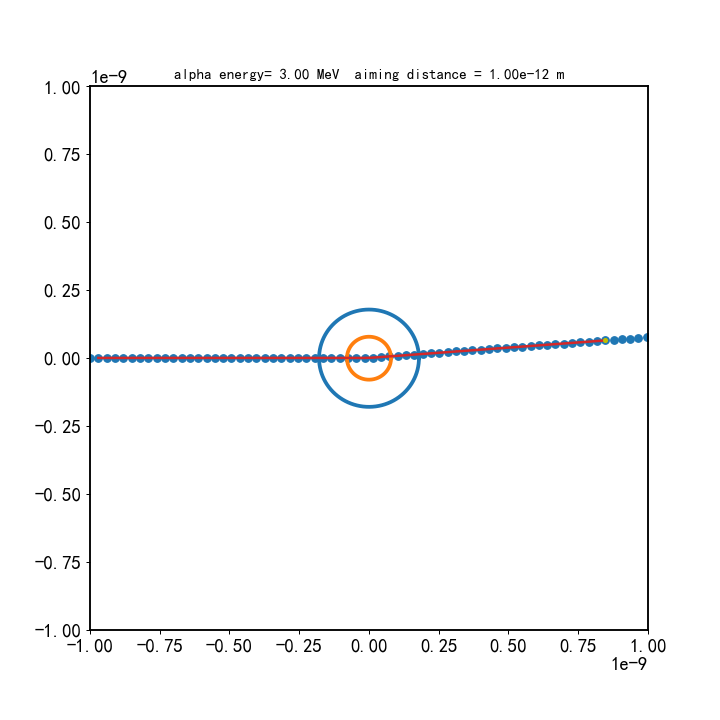

In [25]:
#参数设置
atomic_n=79
electron_n=atomic_n

atomic_r=1.79*10**-10   #1.79埃米
nuclear_r=10**-15

electron_width=10**-10
electron_r=atomic_r-electron_width

v_light=3*10**8

energy_alpha=3    #MeV/c^2,alpha粒子的质量为3752MeV/c^2

def acceleration(x,y):
    distance=(x**2+y**2)**0.5

    if distance>=atomic_r:
        a_x=0
        a_y=0
    elif distance<atomic_r and distance>=electron_r:
        a_x=2*atomic_n*(1-(distance**3-electron_r**3)/(atomic_r**3-electron_r**3))*(x/distance**3)*0.03458
        a_y=2*atomic_n*(1-(distance**3-electron_r**3)/(atomic_r**3-electron_r**3))*(y/distance**3)*0.03458
    elif distance<electron_r and distance>=nuclear_r:
        a_x=2*atomic_n*(x/distance**3)*0.03458
        a_y=2*atomic_n*(y/distance**3)*0.03458
    else:
        a_x=2*atomic_n*((distance/nuclear_r)**3)*(x/distance**3)*0.03458
        a_y=2*atomic_n*((distance/nuclear_r)**3)*(y/distance**3)*0.03458

    return a_x,a_y

def fun(y,t):
    acceleration_x,acceleration_y=acceleration(y[0],y[2])
    return np.array([y[1],#x一阶导
                     acceleration_x,#x二阶导
                    y[3],#y一阶导
                     acceleration_y])#y二阶导

#初始条件
x_initial=-10**-9
speed_alpha=v_light*(2*energy_alpha/3752)**0.5
y_initial=10**-12
speed_y=0

y0=np.array([x_initial,speed_alpha,y_initial,speed_y])
time_total=x_initial/speed_alpha*-2
dt=atomic_r/speed_alpha/6
t = np.arange(0,time_total,dt)

res = odeint(fun,y0,t)
x,y = res[:,0],res[:,2]
r=np.sqrt(x**2+y**2)
print(np.min(r))


fig = plt.figure(figsize=(8,8))
plt_range=10**-9
plt.axis([-plt_range,plt_range,-plt_range,plt_range]) 
plt.title('alpha energy= %1.2f MeV  aiming distance = %.2e m'%(energy_alpha,y_initial))

plt.scatter(x,y)

circle_theta=np.linspace(0,2*np.pi,500)
plt.plot(atomic_r*np.cos(circle_theta),atomic_r*np.sin(circle_theta))
plt.plot(electron_r*np.cos(circle_theta),electron_r*np.sin(circle_theta))
plt.plot(nuclear_r*np.cos(circle_theta),nuclear_r*np.sin(circle_theta))

#plt.text(0.5,-0.4,'靶粒子',fontsize=20)

trace,=plt.plot([],[],',-',lw=2)
point,=plt.plot([],[],'yo',ms=3)
history_x, history_y =[],[]


#time_text = ax.text(0.05, 0.9, s='',ha='left',transform=ax.transAxes)

def animate(i):
    
    this_x=x[i]
    this_y=y[i]
    
    history_x.append(x[i])
    history_y.append(y[i])
    
    if i == 0:
        history_x.clear()
        history_y.clear()


    trace.set_data(history_x, history_y)
    point.set_data(this_x,this_y)
    #time_text.set_text( 'time = %.2e s' % (i*time_totla/time_num))
    
    return trace,point

ani= animation.FuncAnimation(fig,animate,len(y),interval=5, repeat=True)
#ani.save("无核外电子影响.gif", writer='pillow',fps=45)#保存

plt.show()

通过模拟发现，时间也会影响最终的仿真结果，例如，固定时间总长，时间取点为500时，考虑核外电子的作用，可以看到明显的偏转，但如果取点为1000，反而没有明显的偏转。经过取点发现，时间取点在500-900之间，可以看到明显偏转，超过1000，看不到明显偏转。

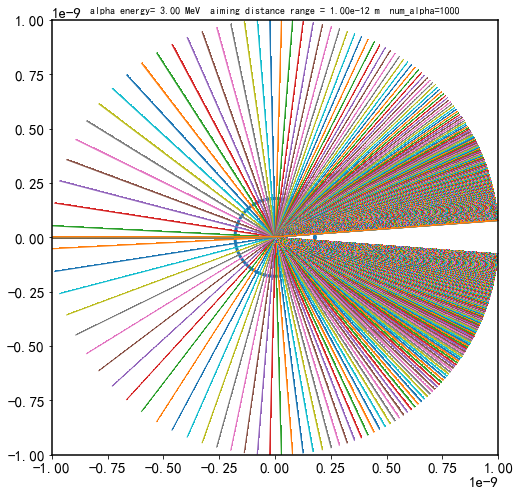

In [28]:
#参数设置
atomic_n=79
electron_n=atomic_n

atomic_r=1.79*10**-10   #1.79埃米
nuclear_r=10**-15

v_light=3*10**8

energy_alpha=3    #MeV/c^2,alpha粒子的质量为3752MeV/c^2

def acceleration(x,y):
    distance=(x**2+y**2)**0.5
    
    '''  
    a_x=2*atomic_n*(x/distance**3)*0.03458
    a_y=2*atomic_n*(y/distance**3)*0.03458
    '''
    
    
    if distance>=atomic_r:
        a_x=0
        a_y=0
    elif distance<atomic_r and distance>=nuclear_r:
        a_x=2*atomic_n*(1-(distance/atomic_r)**3)*(x/distance**3)*0.03458
        a_y=2*atomic_n*(1-(distance/atomic_r)**3)*(y/distance**3)*0.03458 
    else:
        a_x=2*atomic_n*((distance/nuclear_r)**3)*(x/distance**3)*0.03458
        a_y=2*atomic_n*((distance/nuclear_r)**2)*(y/distance**3)*0.03458

    
    return a_x,a_y

def fun(y,t):
    acceleration_x,acceleration_y=acceleration(y[0],y[2])
    return np.array([y[1],#x一阶导
                     acceleration_x,#x二阶导
                    y[3],#y一阶导
                     acceleration_y])#y二阶导

#初始条件
x_initial=-10**-9
speed_alpha=v_light*(2*energy_alpha/3752)**0.5

n_alpha=1000                                                #代表有几个粒子的轨迹
aiming_distance_max=10**-12
aiming_distance_range=np.linspace(-aiming_distance_max,aiming_distance_max,n_alpha)
set_initial=np.zeros((n_alpha, 4), dtype=float)
for i in range(n_alpha):
    set_initial[i][0]=x_initial
    set_initial[i][1]=speed_alpha
    set_initial[i][2]=aiming_distance_range[i]
    set_initial[i][3]=0

time_total=x_initial/speed_alpha*-2
time_num=800
t = np.linspace(0,time_total,time_num)

fig = plt.figure(figsize=(8,8))
plt_range=10**-9
plt.axis([-plt_range,plt_range,-plt_range,plt_range]) 
plt.title('alpha energy= %1.2f MeV  aiming distance range = %.2e m  num_alpha=%d'%(energy_alpha,aiming_distance_max,n_alpha),fontsize=10)


circle_theta=np.linspace(0,2*np.pi,500)
plt.plot(atomic_r*np.cos(circle_theta),atomic_r*np.sin(circle_theta))
plt.plot(nuclear_r*np.cos(circle_theta),nuclear_r*np.sin(circle_theta))

for i in range(len(set_initial)):
    res = odeint(fun, set_initial[i], t)
    x,y = res[:,0],res[:,2]
    plt.plot(x,y,',-',lw=1)

#plt.savefig('考虑电子影响.jpg')    
    
plt.show()

通过对比分析，在小角度散射的时候，考虑核外电子和不考虑核外电子有较大的区别，考虑核外电子的情况下，更不容易发生散射

3.7959028443586453e-14
1.0022863353350083e-16
b=3.796e-14 cot(theta)+1.002e-16


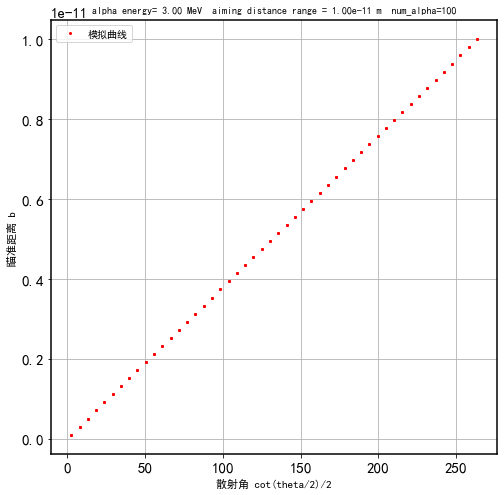

In [29]:
#参数设置
atomic_n=79
electron_n=atomic_n

atomic_r=1.79*10**-10   #1.79埃米
nuclear_r=10**-15

v_light=3*10**8

energy_alpha=3    #MeV/c^2,alpha粒子的质量为3752MeV/c^2

def acceleration(x,y):
    distance=(x**2+y**2)**0.5
    
      
    a_x=2*atomic_n*(x/distance**3)*0.03458
    a_y=2*atomic_n*(y/distance**3)*0.03458
    
    
    '''
    if distance>=atomic_r:
        a_x=0
        a_y=0
    elif distance<atomic_r and distance>=nuclear_r:
        a_x=2*atomic_n*(1-(distance/atomic_r)**3)*(x/distance**3)*0.03458
        a_y=2*atomic_n*(1-(distance/atomic_r)**3)*(y/distance**3)*0.03458 
    else:
        a_x=2*atomic_n*((distance/nuclear_r)**3)*(x/distance**3)*0.03458
        a_y=2*atomic_n*((distance/nuclear_r)**2)*(y/distance**3)*0.03458

    '''
    return a_x,a_y

def fun(y,t):
    acceleration_x,acceleration_y=acceleration(y[0],y[2])
    return np.array([y[1],#x一阶导
                     acceleration_x,#x二阶导
                    y[3],#y一阶导
                     acceleration_y])#y二阶导

#初始条件
x_initial=-10**-9
speed_alpha=v_light*(2*energy_alpha/3752)**0.5

n_alpha=100                                                #代表有几个粒子的轨迹
aiming_distance_max=10**-11
aiming_distance_range=np.linspace(-aiming_distance_max,aiming_distance_max,n_alpha)
set_initial=np.zeros((n_alpha, 4), dtype=float)
for i in range(n_alpha):
    set_initial[i][0]=x_initial
    set_initial[i][1]=speed_alpha
    set_initial[i][2]=aiming_distance_range[i]
    set_initial[i][3]=0

time_total=x_initial/speed_alpha*-2
time_num=500
t = np.linspace(0,time_total,time_num)

b_data=[]
theta_data=[]

fig = plt.figure(figsize=(8,8))
plt.title('alpha energy= %1.2f MeV  aiming distance range = %.2e m  num_alpha=%d'%(energy_alpha,aiming_distance_max,n_alpha),fontsize=10)

for i in range(len(set_initial)):
    res = odeint(fun, set_initial[i], t)
    x,y = res[:,0],res[:,2]
    
    x_V,y_V=res[:,1],res[:,3]       #xy速度
    
    tan_theta=y_V[-1]/x_V[-1]
    
    
    theta=math.atan(y_V[-1]/x_V[-1])   #反解得到散射角
    if theta >= 0 and set_initial[i][2]>=0:
        theta=theta
    elif theta < 0 and set_initial[i][2]>=0:
        theta=theta+np.pi
    elif theta>=0 and set_initial[i][2]<0:
        theta=np.pi-theta
    elif theta<0 and set_initial[i][2]<0:
        theta=-theta
    
    theta_data.append(theta)

    b_data.append(abs(set_initial[i][2]))
    
theta_data =np.array(theta_data)      #将数组转化为numpy数组
b_data=np.array(b_data)               #将数组转化为numpy数组


#探究散射角和瞄准距离的关系
plt.plot(1/np.tan(theta_data/2),b_data,'ro',ms=2,label='模拟曲线')

def fix_1(x, A, B):
    return A * x + B

fix_theta=1/np.tan(theta_data/2)
A1, B1 = optimize.curve_fit(fix_1,fix_theta[1::],b_data[1::])[0]
x1 = np.linspace( np.min(1/np.tan(theta_data/2)), np.max(1/np.tan(theta_data/2)),20)
y1 = A1 * x1 + B1

print(A1)
print(B1)
print('b=%.3e cot(theta)+%.3e'%(A1,B1))

#plt.plot(x1,y1,'-b',marker='*',label='cot(theta/2)/2与b的线性拟合')
plt.ylabel("瞄准距离 b",fontsize=11)
plt.xlabel('散射角 cot(theta/2)/2',fontsize=11)

plt.legend() 
plt.grid()
plt.show()

而根据卢瑟福散射公式，

$b=(Z_{1}Z_{2}e^2/8\pi \varepsilon E )\cot \frac{\theta }{2} $

$e^2/4\pi \varepsilon=1.44fm.MeV$

在此条件下，根据计算得到的公式为

$b=3.792\times10^{-14}  \cot \frac{\theta }{2}$

与理论结果符合得不错

3.7790090123699296e-14
9.39119161428665e-15
b=3.779e-14 cot(theta)+9.391e-15


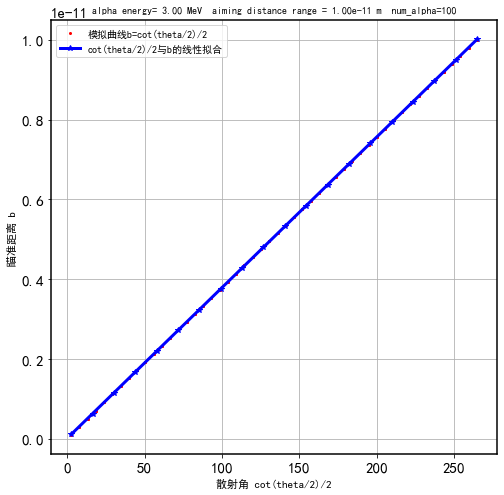

In [30]:
#参数设置
atomic_n=79
electron_n=atomic_n

atomic_r=1.79*10**-10   #1.79埃米
nuclear_r=10**-15

v_light=3*10**8

energy_alpha=3    #MeV/c^2,alpha粒子的质量为3752MeV/c^2

def acceleration(x,y):
    distance=(x**2+y**2)**0.5
    
    '''  
    a_x=2*atomic_n*(x/distance**3)*0.03458
    a_y=2*atomic_n*(y/distance**3)*0.03458
    '''
    
    
    if distance>=atomic_r:
        a_x=0
        a_y=0
    elif distance<atomic_r and distance>=nuclear_r:
        a_x=2*atomic_n*(1-(distance/atomic_r)**3)*(x/distance**3)*0.03458
        a_y=2*atomic_n*(1-(distance/atomic_r)**3)*(y/distance**3)*0.03458 
    else:
        a_x=2*atomic_n*((distance/nuclear_r)**3)*(x/distance**3)*0.03458
        a_y=2*atomic_n*((distance/nuclear_r)**2)*(y/distance**3)*0.03458

    
    return a_x,a_y

def fun(y,t):
    acceleration_x,acceleration_y=acceleration(y[0],y[2])
    return np.array([y[1],#x一阶导
                     acceleration_x,#x二阶导
                    y[3],#y一阶导
                     acceleration_y])#y二阶导

#初始条件
x_initial=-10**-9
speed_alpha=v_light*(2*energy_alpha/3752)**0.5

n_alpha=100                                                #代表有几个粒子的轨迹
aiming_distance_max=10**-11
aiming_distance_range=np.linspace(-aiming_distance_max,aiming_distance_max,n_alpha)
set_initial=np.zeros((n_alpha, 4), dtype=float)
for i in range(n_alpha):
    set_initial[i][0]=x_initial
    set_initial[i][1]=speed_alpha
    set_initial[i][2]=aiming_distance_range[i]
    set_initial[i][3]=0

time_total=x_initial/speed_alpha*-2
time_num=500
t = np.linspace(0,time_total,time_num)

b_data=[]
theta_data=[]

fig = plt.figure(figsize=(8,8))
plt.title('alpha energy= %1.2f MeV  aiming distance range = %.2e m  num_alpha=%d'%(energy_alpha,aiming_distance_max,n_alpha),fontsize=10)

for i in range(len(set_initial)):
    res = odeint(fun, set_initial[i], t)
    x,y = res[:,0],res[:,2]
    
    x_V,y_V=res[:,1],res[:,3]       #xy速度
    
    tan_theta=y_V[-1]/x_V[-1]
    
    
    theta=math.atan(y_V[-1]/x_V[-1])   #反解得到散射角
    if theta >= 0 and set_initial[i][2]>=0:
        theta=theta
    elif theta < 0 and set_initial[i][2]>=0:
        theta=theta+np.pi
    elif theta>=0 and set_initial[i][2]<0:
        theta=np.pi-theta
    elif theta<0 and set_initial[i][2]<0:
        theta=-theta
    
    theta_data.append(theta)

    b_data.append(abs(set_initial[i][2]))
    
theta_data =np.array(theta_data)      #将数组转化为numpy数组
b_data=np.array(b_data)               #将数组转化为numpy数组


#探究散射角和瞄准距离的关系
plt.plot(1/np.tan(theta_data/2),b_data,'ro',ms=2,label='模拟曲线b=cot(theta/2)/2')

def fix_1(x, A, B):
    return A * x + B

fix_theta=1/np.tan(theta_data/2)
A1, B1 = optimize.curve_fit(fix_1,fix_theta[1::],b_data[1::])[0]
x1 = np.linspace( np.min(1/np.tan(theta_data/2)), np.max(1/np.tan(theta_data/2)),20)
y1 = A1 * x1 + B1

print(A1)
print(B1)
print('b=%.3e cot(theta)+%.3e'%(A1,B1))

plt.plot(x1,y1,'-b',marker='*',label='cot(theta/2)/2与b的线性拟合')
plt.ylabel("瞄准距离 b",fontsize=11)
plt.xlabel('散射角 cot(theta/2)/2',fontsize=11)

plt.legend() 
plt.grid()
plt.show()

这个是考虑核外电子影响的结果

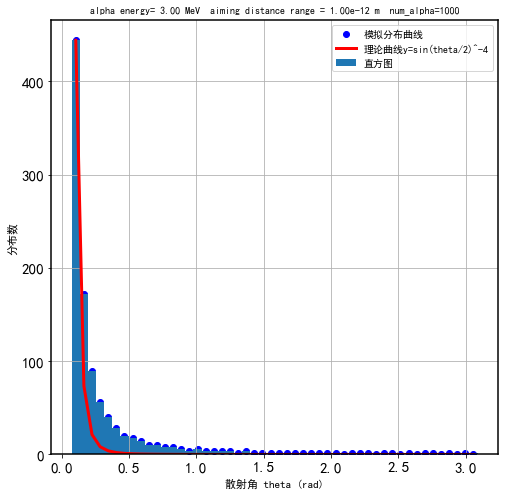

In [31]:
#参数设置
atomic_n=79
electron_n=atomic_n

atomic_r=1.79*10**-10   #1.79埃米
nuclear_r=10**-15

v_light=3*10**8

energy_alpha=3    #MeV/c^2,alpha粒子的质量为3752MeV/c^2

def acceleration(x,y):
    distance=(x**2+y**2)**0.5
    
    ''' 
    a_x=2*atomic_n*(x/distance**3)*0.03458
    a_y=2*atomic_n*(y/distance**3)*0.03458
    '''
    
   
    if distance>=atomic_r:
        a_x=0
        a_y=0
    elif distance<atomic_r and distance>=nuclear_r:
        a_x=2*atomic_n*(1-(distance/atomic_r)**3)*(x/distance**3)*0.03458
        a_y=2*atomic_n*(1-(distance/atomic_r)**3)*(y/distance**3)*0.03458 
    else:
        a_x=2*atomic_n*((distance/nuclear_r)**3)*(x/distance**3)*0.03458
        a_y=2*atomic_n*((distance/nuclear_r)**2)*(y/distance**3)*0.03458

    
    return a_x,a_y

def fun(y,t):
    acceleration_x,acceleration_y=acceleration(y[0],y[2])
    return np.array([y[1],#x一阶导
                     acceleration_x,#x二阶导
                    y[3],#y一阶导
                     acceleration_y])#y二阶导

#初始条件
x_initial=-10**-9
speed_alpha=v_light*(2*energy_alpha/3752)**0.5

n_alpha=1000                                                #代表有几个粒子的轨迹
aiming_distance_max=10**-12
aiming_distance_range=np.linspace(-aiming_distance_max,aiming_distance_max,n_alpha)
set_initial=np.zeros((n_alpha, 4), dtype=float)
for i in range(n_alpha):
    set_initial[i][0]=x_initial
    set_initial[i][1]=speed_alpha
    set_initial[i][2]=aiming_distance_range[i]
    set_initial[i][3]=0

time_total=x_initial/speed_alpha*-2
time_num=800
t = np.linspace(0,time_total,time_num)

b_data=[]
theta_data=[]

fig = plt.figure(figsize=(8,8))
plt.title('alpha energy= %1.2f MeV  aiming distance range = %.2e m  num_alpha=%d'%(energy_alpha,aiming_distance_max,n_alpha),fontsize=10)

for i in range(len(set_initial)):
    res = odeint(fun, set_initial[i], t)
    x,y = res[:,0],res[:,2]
    
    x_V,y_V=res[:,1],res[:,3]       #xy速度
    
    tan_theta=y_V[-1]/x_V[-1]
    
    
    theta=math.atan(y_V[-1]/x_V[-1])   #反解得到散射角
    if theta >= 0 and set_initial[i][2]>=0:
        theta=theta
    elif theta < 0 and set_initial[i][2]>=0:
        theta=theta+np.pi
    elif theta>=0 and set_initial[i][2]<0:
        theta=np.pi-theta
    elif theta<0 and set_initial[i][2]<0:
        theta=-theta
    
    theta_data.append(theta)

    b_data.append(abs(set_initial[i][2]))
    
theta_data =np.array(theta_data)      #将数组转化为numpy数组
b_data=np.array(b_data)               #将数组转化为numpy数组


#探究散射角和瞄准距离的关系

def theta_distribution_fun(data_theta,theta_range,num):
    data_theta=np.array(data_theta)
    theta_range=np.array(theta_range)
    theta_bar=np.linspace(theta_range[0],theta_range[1],num+1)
    distribution=np.zeros((2,num),dtype=float)
    for i in range(num):
        distribution[0][i]=(theta_bar[i]+theta_bar[i+1])/2
        num_sum=0
        for j in data_theta:
            if j>=theta_bar[i] and j<theta_bar[i+1]:
                num_sum=num_sum+1
        distribution[1][i]=num_sum        
    
    return distribution

n_bar=50
theta_distribution=theta_distribution_fun(theta_data,[np.min(theta_data),np.max(theta_data)],n_bar)
plt.scatter(theta_distribution[0,:],theta_distribution[1,:],c='b',label='模拟分布曲线')
plt.plot(theta_distribution[0,:],((theta_distribution[1][0])/(theta_distribution[0][0]/2)**-4)*(theta_distribution[0,:]/2)**-4,
         c='r',label='理论曲线y=sin(theta/2)^-4')
plt.hist(theta_data,n_bar,label='直方图')


plt.ylabel("分布数",fontsize=11)
plt.xlabel('散射角 theta (rad)',fontsize=11)


plt.legend() 
plt.grid()
plt.show()

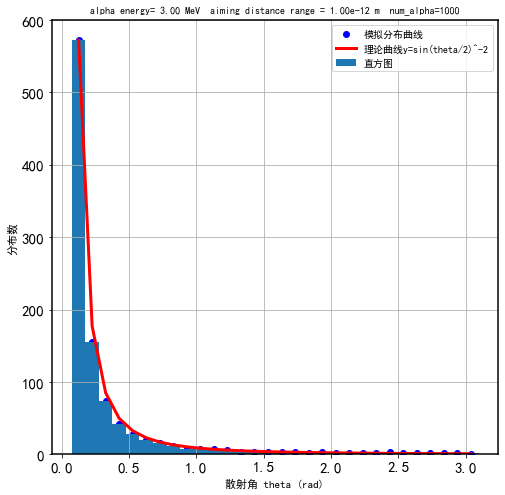

In [32]:
#参数设置
atomic_n=79
electron_n=atomic_n

atomic_r=1.79*10**-10   #1.79埃米
nuclear_r=10**-15

v_light=3*10**8

energy_alpha=3    #MeV/c^2,alpha粒子的质量为3752MeV/c^2

def acceleration(x,y):
    distance=(x**2+y**2)**0.5
    
    ''' 
    a_x=2*atomic_n*(x/distance**3)*0.03458
    a_y=2*atomic_n*(y/distance**3)*0.03458
    '''
    
   
    if distance>=atomic_r:
        a_x=0
        a_y=0
    elif distance<atomic_r and distance>=nuclear_r:
        a_x=2*atomic_n*(1-(distance/atomic_r)**3)*(x/distance**3)*0.03458
        a_y=2*atomic_n*(1-(distance/atomic_r)**3)*(y/distance**3)*0.03458 
    else:
        a_x=2*atomic_n*((distance/nuclear_r)**3)*(x/distance**3)*0.03458
        a_y=2*atomic_n*((distance/nuclear_r)**2)*(y/distance**3)*0.03458

    
    return a_x,a_y

def fun(y,t):
    acceleration_x,acceleration_y=acceleration(y[0],y[2])
    return np.array([y[1],#x一阶导
                     acceleration_x,#x二阶导
                    y[3],#y一阶导
                     acceleration_y])#y二阶导

#初始条件
x_initial=-10**-9
speed_alpha=v_light*(2*energy_alpha/3752)**0.5

n_alpha=1000                                                #代表有几个粒子的轨迹
aiming_distance_max=10**-12
aiming_distance_range=np.linspace(-aiming_distance_max,aiming_distance_max,n_alpha)
set_initial=np.zeros((n_alpha, 4), dtype=float)
for i in range(n_alpha):
    set_initial[i][0]=x_initial
    set_initial[i][1]=speed_alpha
    set_initial[i][2]=aiming_distance_range[i]
    set_initial[i][3]=0

time_total=x_initial/speed_alpha*-2
time_num=800
t = np.linspace(0,time_total,time_num)

b_data=[]
theta_data=[]

fig = plt.figure(figsize=(8,8))
plt.title('alpha energy= %1.2f MeV  aiming distance range = %.2e m  num_alpha=%d'%(energy_alpha,aiming_distance_max,n_alpha),fontsize=10)

for i in range(len(set_initial)):
    res = odeint(fun, set_initial[i], t)
    x,y = res[:,0],res[:,2]
    
    x_V,y_V=res[:,1],res[:,3]       #xy速度
    
    tan_theta=y_V[-1]/x_V[-1]
    
    
    theta=math.atan(y_V[-1]/x_V[-1])   #反解得到散射角
    if theta >= 0 and set_initial[i][2]>=0:
        theta=theta
    elif theta < 0 and set_initial[i][2]>=0:
        theta=theta+np.pi
    elif theta>=0 and set_initial[i][2]<0:
        theta=np.pi-theta
    elif theta<0 and set_initial[i][2]<0:
        theta=-theta
    
    theta_data.append(theta)

    b_data.append(abs(set_initial[i][2]))
    
theta_data =np.array(theta_data)      #将数组转化为numpy数组
b_data=np.array(b_data)               #将数组转化为numpy数组


#探究散射角和瞄准距离的关系

def theta_distribution_fun(data_theta,theta_range,num):
    data_theta=np.array(data_theta)
    theta_range=np.array(theta_range)
    theta_bar=np.linspace(theta_range[0],theta_range[1],num+1)
    distribution=np.zeros((2,num),dtype=float)
    for i in range(num):
        distribution[0][i]=(theta_bar[i]+theta_bar[i+1])/2
        num_sum=0
        for j in data_theta:
            if j>=theta_bar[i] and j<theta_bar[i+1]:
                num_sum=num_sum+1
        distribution[1][i]=num_sum        
    
    return distribution

n_bar=30
theta_distribution=theta_distribution_fun(theta_data,[np.min(theta_data),np.max(theta_data)],n_bar)
plt.scatter(theta_distribution[0,:],theta_distribution[1,:],c='b',label='模拟分布曲线')
plt.plot(theta_distribution[0,:],((theta_distribution[1][0])/(theta_distribution[0][0]/2)**-2)*(theta_distribution[0,:]/2)**-2,
         c='r',label='理论曲线y=sin(theta/2)^-2')
plt.hist(theta_data,n_bar,label='直方图')


plt.ylabel("分布数",fontsize=11)
plt.xlabel('散射角 theta (rad)',fontsize=11)


plt.legend() 
plt.grid()
plt.show()

根据库伦散射公式

$b=\frac{a}{2}\cot  \frac{\theta }{2} $
两边取微分得到

$db=-\frac{a}{2} \frac{1}{\sin ^{2}\frac{\theta }{2}  } $

而粒子数分布

$dN=\lambda db$ ,$\lambda$为粒子数密度

$dN=-\frac{a\lambda }{2} \frac{1}{\sin ^{2}\frac{\theta }{2}  } $

因此

$dN\propto \frac{1}{\sin ^{2}\frac{\theta }{2}  } $